## Configuration and import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install pm4py
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/trello-logs/CSVs-completos.zip .
!cp /content/drive/MyDrive/trello-logs/bomi.py .
!unzip CSVs-completos.zip

     |████████████████████████████████| 1.8 MB 10.5 MB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23589 sha256=5abd55284bca46d50af4b334a31c33253ad01a467e882534716796c2da01212a
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist
Mounted at /content/drive
Archive:  CSVs-completos.zip
   creating: CSVs-completos/
  inflating: __MACOSX/._CSVs-completos  
  inflating: CSVs-completos/Merseyside Fire & Rescue Training and Education information trello.csv  
  inflating: __MACOSX/CSVs-completos/._Merseyside Fire & Rescue Training and Education information trello.csv  
  inflating: CSVs-completos/speleo.se.csv  
  inflating: __MACOSX/CSVs-completos/._speleo.se.csv  
  inflating: CSVs-completos/浙江任务.csv  
  inflating: __MACOSX/CSVs-completos/._浙江任务.csv  
  inflating: CSVs-completos/Iishee orooroi.csv  
  inflating: __MACOSX/CSVs-completos/._Iishee orooroi.csv  
 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import bomi

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [5]:
import os

all = []
for file in os.listdir("CSVs-completos"):
    df = pd.read_csv(f"CSVs-completos/{file}", index_col=0, parse_dates=["date"], low_memory=False)
    info = bomi.log_info(df)
    

    info['name'] = file
    all.append(info)

result = pd.DataFrame.from_records(pd.json_normalize(all))
result['board_duration'] = (result['ends'] - result['start'])
result.head(10)

,events,attribs,cards,lists,list_first_create,list_last_create,list_renamed,list_closed,start,ends,board_duration,first_event_type,members,card_members_assigned,card_checklists,card_movement,card_closed,card_deleted,card_due,cards_moving_perc,cards_checklist_perc,cards_assigned_perc,cards_closed_perc,name,events_per_member.count,events_per_member.mean,events_per_member.std,events_per_member.min,events_per_member.25%,events_per_member.50%,events_per_member.75%,events_per_member.max
0,751,82,125,6,2016-04-20 02:38:20.951,2018-02-27 00:10:59.887,2,0,2016-04-20 02:35:27.326,2018-06-19 19:33:07.913,790 days 16:57:40.587000,createBoard,4,79,13,114,13,4,53,0.616000,0.104000,0.520000,0.104000,Warframe.csv,4.0,187.750000,35.649918,152.0,171.50,181.0,197.25,237.0
1,690,34,481,1,2021-04-19 14:53:40.466,2021-04-19 14:53:40.466,0,0,2021-04-19 14:53:22.684,2021-09-15 17:27:09.508,149 days 02:33:46.824000,createBoard,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,ourdetpasap.csv,1.0,690.000000,NaN,690.0,690.00,690.0,690.00,690.0
2,261,55,35,17,2022-02-20 09:13:56.467,2022-02-20 10:12:05.597,2,11,2022-02-20 09:06:27.097,2022-03-02 12:46:02.926,10 days 03:39:35.829000,copyBoard,1,0,0,9,7,0,0,0.171429,0.000000,0.000000,0.200000,Birbchu's comm queue and prices.csv,1.0,261.000000,NaN,261.0,261.00,261.0,261.00,261.0
3,323,60,155,12,2021-06-20 19:13:09.823,2022-01-15 21:29:36.967,3,2,2021-06-20 19:13:09.304,2022-02-26 14:13:10.883,250 days 19:00:01.579000,createBoard,2,0,1,1,0,11,0,0.006452,0.006452,0.000000,0.000000,Notas Pau&Di.csv,2.0,161.500000,111.015765,83.0,122.25,161.5,200.75,240.0
4,207,34,35,3,2021-08-18 09:28:06.537,2021-08-18 09:28:06.537,0,0,2021-08-18 09:27:40.892,2022-01-18 10:36:11.441,153 days 01:08:30.549000,createBoard,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,thingbullrashe.csv,1.0,207.000000,NaN,207.0,207.00,207.0,207.00,207.0
5,284,33,234,22,2015-09-07 21:11:36.448,2016-03-02 15:27:22.644,5,0,2015-09-07 21:11:02.685,2016-03-02 15:27:33.881,176 days 18:16:31.196000,createBoard,1,0,0,1,0,0,0,0.004274,0.000000,0.000000,0.000000,KonMari.csv,1.0,284.000000,NaN,284.0,284.00,284.0,284.00,284.0
6,276,31,66,18,NaT,NaT,0,0,2021-09-21 10:37:31.718,2022-02-20 17:02:45.052,152 days 06:25:13.334000,copyBoard,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,flexcedives.csv,1.0,276.000000,NaN,276.0,276.00,276.0,276.00,276.0
7,1064,74,240,17,2022-01-23 14:03:06.808,2022-02-18 01:11:15.271,23,0,2021-04-21 04:51:25.507,2022-03-02 12:16:04.278,315 days 07:24:38.771000,createBoard,3,2,0,46,23,6,0,0.145833,0.000000,0.008333,0.095833,Anime Rifts.csv,3.0,354.666667,379.057164,34.0,145.50,257.0,515.00,773.0
8,403,72,39,10,2020-05-04 14:02:18.720,2021-05-18 09:14:15.384,9,3,2020-05-04 14:00:47.499,2021-05-20 11:46:10.629,380 days 21:45:23.130000,createBoard,5,0,0,7,8,1,0,0.153846,0.000000,0.000000,0.205128,World Bee Day - 20 May.csv,5.0,80.600000,100.842947,4.0,7.00,13.0,166.00,213.0
9,1113,84,222,11,2021-03-11 16:13:43.144,2021-05-04 02:12:46.297,8,0,2021-03-11 16:13:16.342,2021-05-07 06:24:46.287,56 days 14:11:29.945000,createBoard,2,0,13,12,34,0,1,0.045045,0.049550,0.000000,0.153153,Pérola Padilha.csv,2.0,556.500000,535.279833,178.0,367.25,556.5,745.75,935.0


# Individual analysis

In [6]:
#Board reading
df = pd.read_csv(f"CSVs-completos/Oeagag Trello.csv", index_col=0, parse_dates=["date"], low_memory=False)
bomi.enrich_log(df)
begin_end_redesign = bomi.detect_redesign(df, pd.Timedelta('1D'), threshold_l_events=4)
filtered_result = bomi.list_evolution(df, filter_short_lists=pd.Timedelta('30m'))
cl = bomi.connected_lists(df, use='comb', threshold=0)
df.shape

(4544, 82)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65117 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65118 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65117 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65118 missing from current font.
  font.set_text(s, 0, flags=flags)


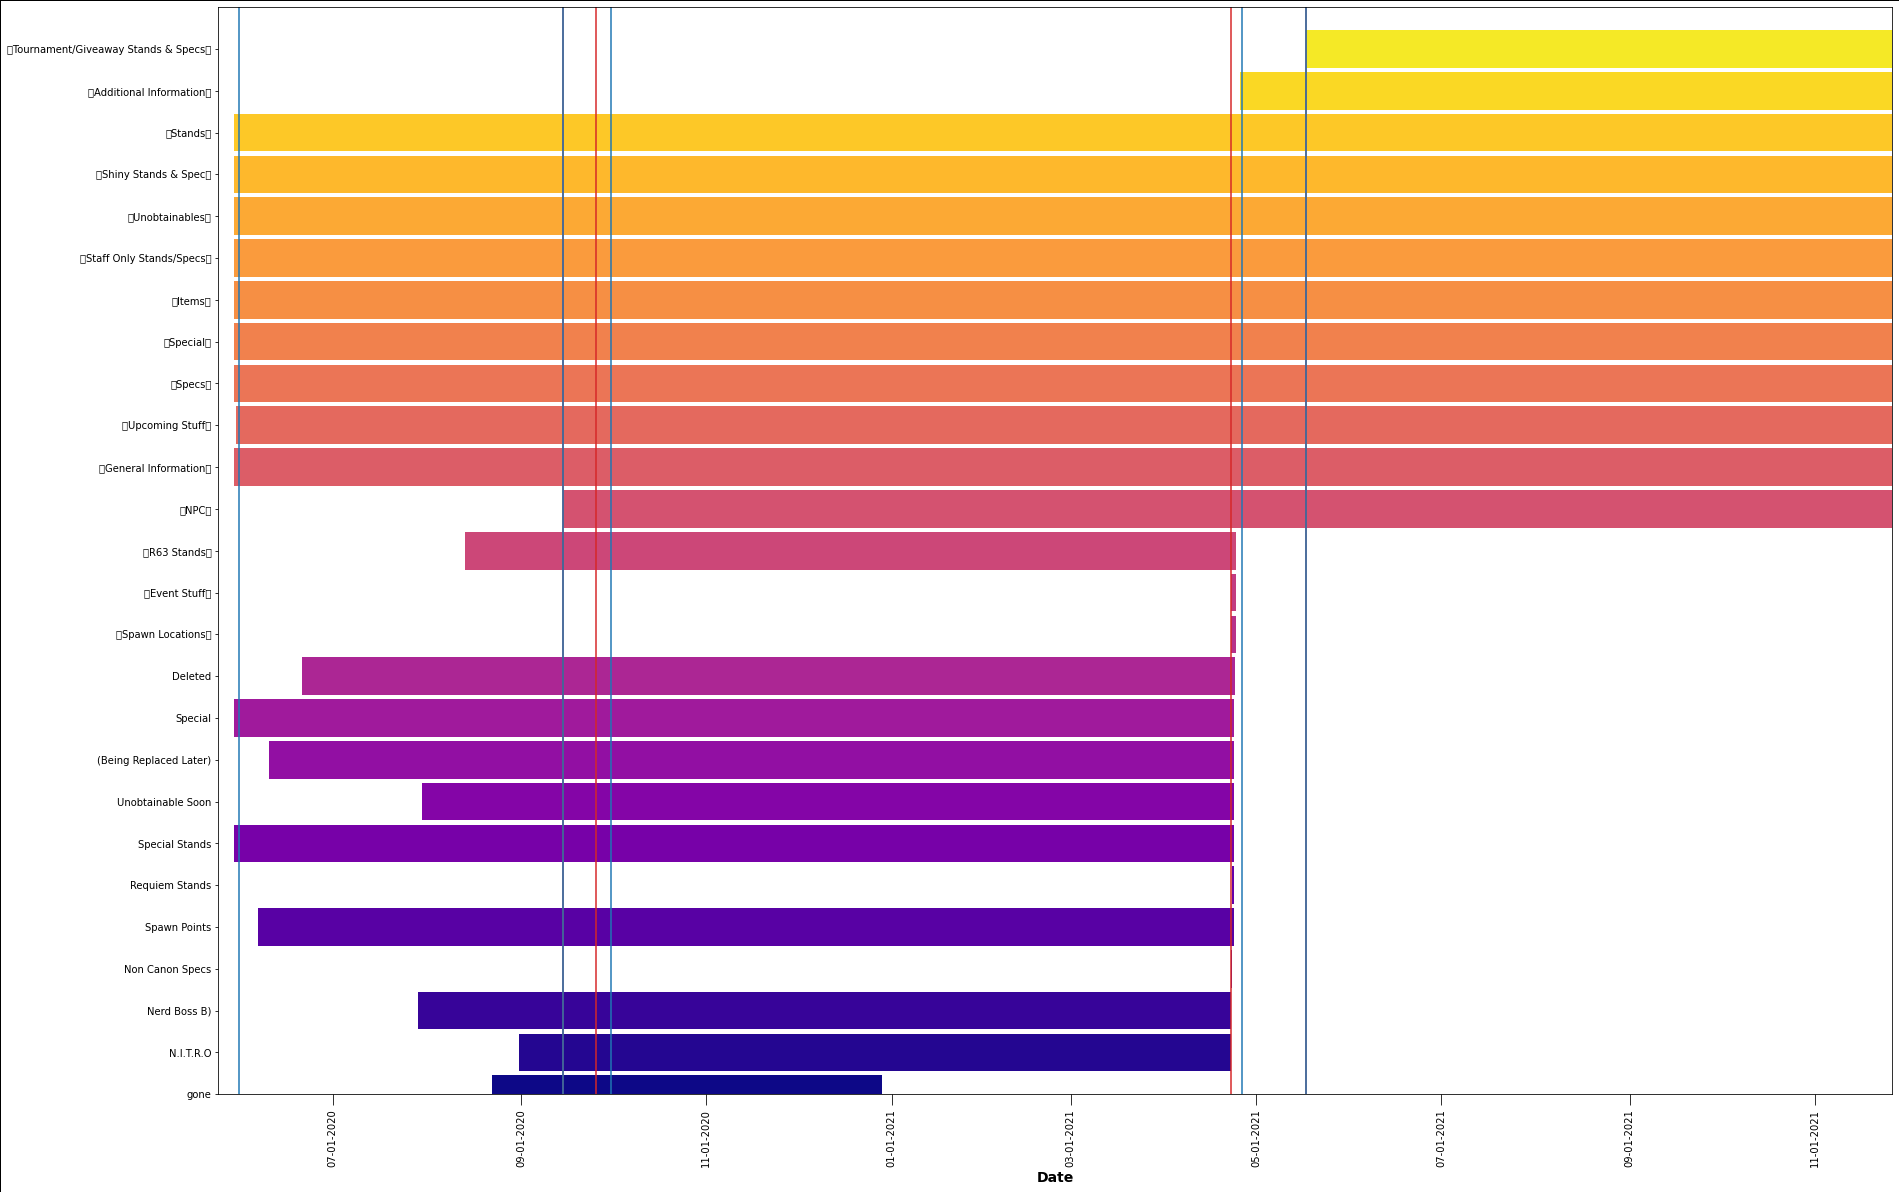

In [7]:
#Evolution of the lists of the board over time (x-axis). Each row represents a list. The vertical lines represent the structural updates (red when it starts and blue when it finishes).

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 20), edgecolor="black", linewidth=1)
bomi.plot_list_diagram(filtered_result, begin_end_redesign, ax)
plt.show()


In [8]:
#Board discovery: design (lists) and use (create and close cards, flow and semantic precedence)
bd = bomi.board_discovery(df, use='id', sp_threshold=0)
bd

{'card_close_list': data.list.id
 ﹝General Information﹞    0.272727
 ﹝Shiny Stands & Spec﹞    0.181818
 ﹝Unobtainables﹞          0.090909
 Shiny Stands             0.363636
 Canon Specs              0.090909
 Name: id, dtype: float64, 'card_create_list': data.list.id
 ﹝General Information﹞       0.027778
 Stands                      0.126984
 ﹝Shiny Stands & Spec﹞       0.107143
 Special Stands              0.051587
 ﹝Unobtainables﹞             0.027778
 HR Exclusive                0.015873
 ﹝Items﹞                     0.146825
 Shiny Stands                0.146825
 Special                     0.027778
 Canon Specs                 0.059524
 ﹝Upcoming Stuff﹞            0.210317
 Spawn Points                0.003968
 Nerd Boss B)                0.003968
 ﹝R63 Stands﹞                0.003968
 ﹝NPC﹞                       0.019841
 ﹝Event Stuff﹞               0.015873
 ﹝Additional Information﹞    0.003968
 Name: id, dtype: float64, 'card_flow': [{'(Being Replaced Later)',
   'Cancel 😢😢',
  

In [9]:
#Metrics
info = bomi.static_metrics(df, begin_end_redesign)
info

,events,cards,lists,list_num_components,list_connected_size_mean,list_connected_size_mean_perc,list_num_components_move,move_per_list_with_move,list_with_move_perc,cards_moving_perc,moves_per_moving_card,act_per_list,cards_act_perc,act_per_act_card,cards_closed_perc
"(2021-05-17 11:10:06.451000, 2021-11-26 12:25:26.502000]",60,26,8,7,1.142857,0.142857,1,2.000,0.250000,0.076923,1.000000,5.875000,0.846154,2.409091,0.153846
"(2021-04-26 05:37:17.543000, 2021-05-17 09:26:36.380000]",114,22,7,6,1.166667,0.166667,1,3.000,0.285714,0.136364,1.000000,16.666667,0.954545,5.142857,0.045455
"(2020-09-30 14:25:55.666000, 2021-04-22 15:58:14.646000]",1304,188,18,8,2.375000,0.125000,1,10.500,0.631579,0.202128,1.657895,71.312500,0.957447,6.527778,0.010638
"(2020-09-14 16:27:00.995000, 2020-09-25 16:27:43.903000]",135,29,10,9,1.222222,0.111111,2,1.000,0.363636,0.068966,1.000000,12.500000,1.000000,4.310345,0.000000
"(2020-05-31 06:07:58.806000, 2020-09-14 16:09:32.381000]",1216,136,20,5,4.000000,0.200000,1,16.375,0.800000,0.441176,2.183333,52.055556,0.970588,7.469697,0.007353


In [10]:
# Days between redesigns
days_redesigns = pd.concat([begin_end_redesign['max'], begin_end_redesign['min'].shift(1, fill_value=df['date'].max())], keys=['first', 'last'], axis=1)
days_redesigns

,first,last
1,2021-05-17 11:10:06.451000+00:00,2021-11-26 12:25:26.502000+00:00
2,2021-04-26 05:37:17.543000+00:00,2021-05-17 09:26:36.380000+00:00
5,2020-09-30 14:25:55.666000+00:00,2021-04-22 15:58:14.646000+00:00
7,2020-09-14 16:27:00.995000+00:00,2020-09-25 16:27:43.903000+00:00
21,2020-05-31 06:07:58.806000+00:00,2020-09-14 16:09:32.381000+00:00


In [11]:
#Filtering an interval of he entire log
df_filter = df[(df["date"] > days_redesigns.iloc[2]['first']) & (df["date"] < days_redesigns.iloc[1]["last"])]
df_filter.shape

(2584, 82)

In [12]:
#Board discovery (restricted at the interval)
bomi.board_discovery(df_filter, use='id')

{'card_close_list': data.list.id
 ﹝General Information﹞    0.500000
 ﹝Unobtainables﹞          0.166667
 Shiny Stands             0.333333
 Name: id, dtype: float64, 'card_create_list': data.list.id
 ﹝General Information﹞       0.038835
 Stands                      0.097087
 Shiny Stands/Spec           0.194175
 Special Stands              0.048544
 ﹝Unobtainables﹞             0.058252
 HR Exclusive                0.019417
 ﹝Items﹞                     0.077670
 Shiny Stands                0.184466
 Special                     0.009709
 Canon Specs                 0.077670
 ﹝Upcoming Stuff﹞            0.126214
 NPC                         0.019417
 ﹝Event Stuff﹞               0.038835
 ﹝Additional Information﹞    0.009709
 Name: id, dtype: float64, 'card_flow': [{'Canon Specs',
   'HR Exclusive',
   'NPC',
   'Nerd Boss B)',
   'Non Canon Specs',
   'Remove',
   'Requiem Stands',
   'Shiny Stands',
   'Shiny Stands/Spec',
   'Spawn Points',
   'Special',
   'Special Stands',
   'Stands',